# Import Libraries

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split

import skfda
from skfda.ml.classification import KNeighborsClassifier

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


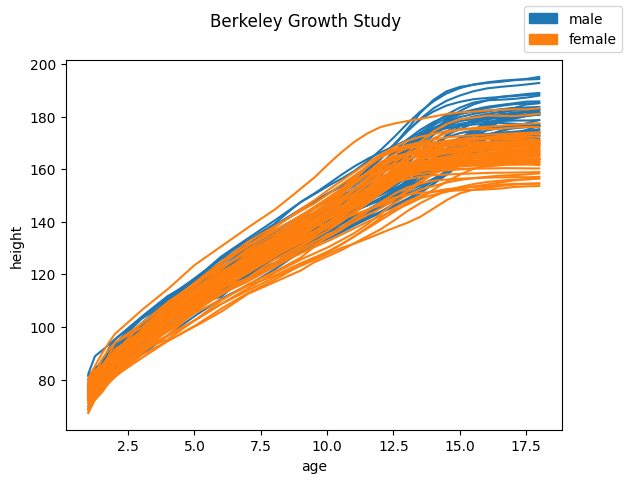

In [58]:

X, y = skfda.datasets.fetch_growth(return_X_y=True, as_frame=True)
X = X.iloc[:, 0].values
y = y.values

# Plot samples grouped by sex
X.plot(group=y.codes, group_names=y.categories)

y = y.codes

print(y)

## Split training and test set

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    stratify=y,
    random_state=0,
)

## Initialize KNN Classifier

In [60]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Create prediction

In [61]:
pred = knn.predict(X_test)
print(pred)

[0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1]


In [62]:
score = knn.score(X_test, y_test)
print(score)

0.9583333333333334


In [63]:
probs = knn.predict_proba(X_test[:5])  # Predict first 5 samples
print(probs)

[[1.  0. ]
 [0.6 0.4]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]]


In [64]:
# Only odd numbers, to prevent ties
param_grid = {"n_neighbors": range(1, 18, 2)}


knn = KNeighborsClassifier()

# Perform grid search with cross-validation
gscv = GridSearchCV(knn, param_grid, cv=5)
gscv.fit(X_train, y_train)


print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

Best params: {'n_neighbors': 11}
Best cross-validation score: 0.9571428571428573


### Plot the cross validation score distribution

(0.9, 1.0)

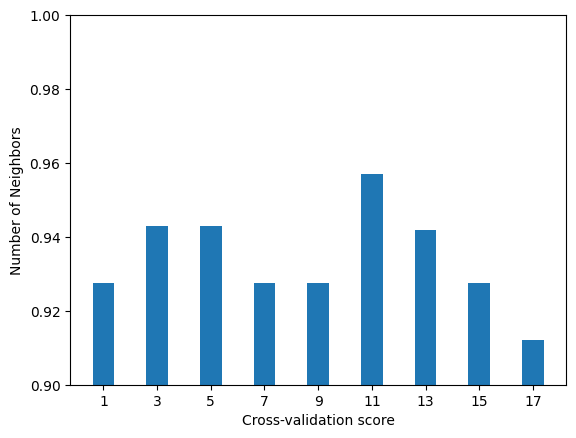

In [65]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(param_grid["n_neighbors"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_neighbors"])
ax.set_ylabel("Number of Neighbors")
ax.set_xlabel("Cross-validation score")
ax.set_ylim((0.9, 1))

In [66]:
score = gscv.score(X_test, y_test)
print(score)

1.0


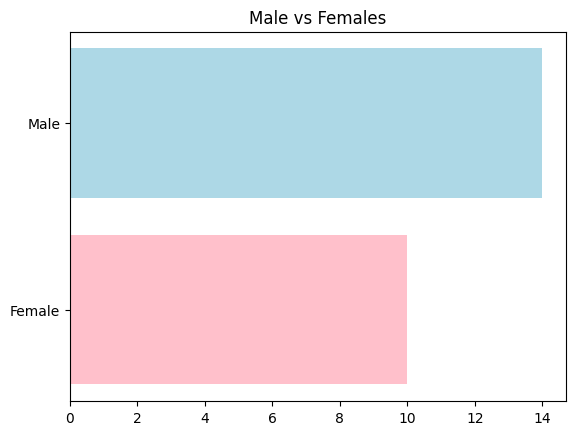

In [67]:
# Counting occurrences of each value in y
counts = [sum(y_test == 0), sum(y_test == 1)]

# Defining the labels and colors
labels = ['Female', 'Male']
colors = ['pink', 'lightblue']

plt.barh(labels, counts, color=colors)
plt.title("Male vs Females")
plt.show()

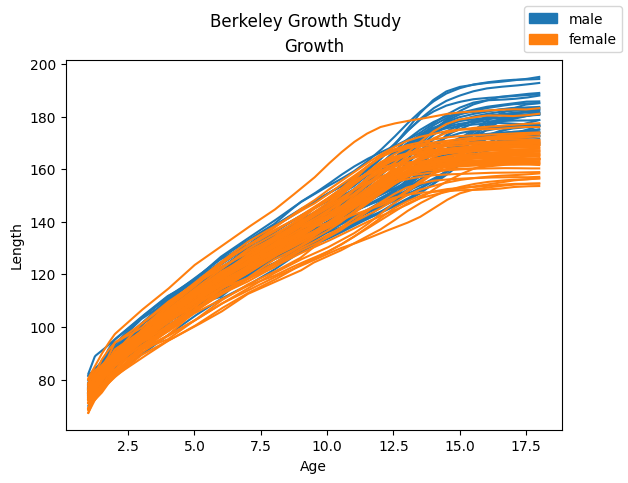

In [70]:
import matplotlib.pyplot as plt
import skfda
from skfda.datasets import fetch_growth


X, y = skfda.datasets.fetch_growth(return_X_y=True, as_frame=True)
X = X.iloc[:, 0].values
y = y.values

X.plot(group=y.codes, group_names=y.categories)
plt.title("Growth")
plt.xlabel("Age")
plt.ylabel("Length")
plt.show()



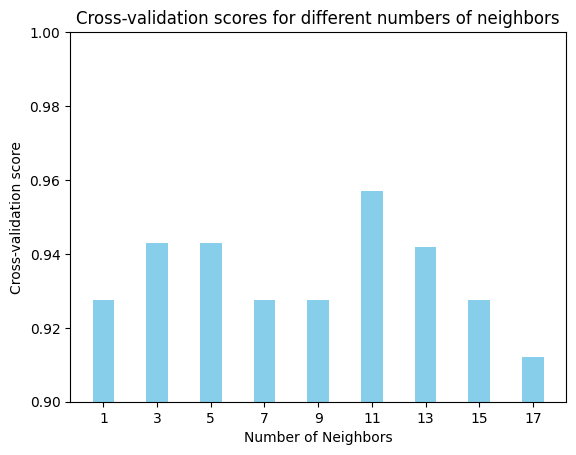

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plotting the bar chart
ax.bar(param_grid["n_neighbors"], gscv.cv_results_["mean_test_score"], color='skyblue')

# Setting the title and labels
ax.set_title("Cross-validation scores for different numbers of neighbors")
ax.set_xlabel("Number of Neighbors")
ax.set_ylabel("Cross-validation score")

# Adjusting the y-axis limit
ax.set_ylim((0.9, 1))

# Setting the x-axis ticks
ax.set_xticks(param_grid["n_neighbors"])

ax.set_xticklabels(param_grid["n_neighbors"], rotation=0)

plt.show()


In [71]:
print(y_test)


[0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1]
